# Generalized additive models in R: inference and interpretation


In this lesson, we’ll continue to build our knowledge of how to analyze data in R using GAMs. In particular, we’ll learn to interpret and analyze GAM output in R, and assess whether a smoothed fit was necessary, or whether a linear fit would be sufficient.


## Data simulation

Let's consider our simulated data example from a previous lesson. There, we generated three predictors, two continuous and one categorical, and a response according to:

\begin{align*}
Y_i =  \sin\big(\frac{\pi}{2}x_{i,1} \big) + 3 x_{i,2} + x_{i,3} + \varepsilon_i,
\end{align*}

with the typical assumptions on $\varepsilon_i$.

We first generate the data:

In [1]:
set.seed(12)

#construct predictors 
n = 100
d = data.frame(
   x1=runif(n, -3, 3),
   x2 = rnorm(n, 3, 0.1),
   x3=as.factor(sample(c('A','B','C'),size=n,replace=TRUE)))

#construct response
mu = with(d, sin(pi/2*x1) + 3*x2 + as.integer(x3))

d$y = rnorm(n, mu, 0.1); 

Let's split the data into a training and test set. We'll do this so that we can compare models in terms of their predictive power.

In [2]:
set.seed(12)

m = floor(0.8 * nrow(d))
index = sample(seq_len(nrow(d)), size = m)

train = d[index, ]
test = d[-index, ]

First, we fit the GAM from a previous lesson (using the `gam()` function in the `mgcv` package), namely, the one where $x_1$ enters nonparametrically, and the other predictors enter parametrically. Here's the summary:

In [3]:
library(mgcv)
g = gam(y ~ s(x1) + x2 + x3, data = train, family = gaussian)
summary(g)

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.



Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1) + x2 + x3

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.49974    0.36072   4.158 9.25e-05 ***
x2           2.81405    0.12020  23.412  < 2e-16 ***
x3B          1.02847    0.02579  39.875  < 2e-16 ***
x3C          1.94796    0.02498  77.973  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
        edf Ref.df     F p-value    
s(x1) 8.283  8.853 600.9  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.994   Deviance explained = 99.5%
GCV = 0.0091693  Scale est. = 0.0077614  n = 80

## Interpretation of the model

For this model, we have two predictors entering parametrically, and one entering nonlinearly/nonparametrically. Note that the summary output reflects this by separating summaries for the parametric and nonparametric/smooth terms. The parametric terms have the same interpretation that they have for standard linear regression. That's actually a great feature of GAMs! For terms that enter the model linearly, we retain the ease of interpretation. For example, we could say that:

1. As we move from level $A$ to level $B$ of the factor $x_3$, we see a mean increase of $\approx 1.028$ in the response, adjusting for $x_1$ and $x_2$. It's just that, now, our adjustment of $x_1$ takes on a nonlinear form!

2. For a one-unit increase in $x_2$, we see a mean increase of $\approx 2.814$ in the response, adjusting for $x_1$ and the levels of $x_3$. 

3. An interpretation of $x_1$ is not as straight forward, since it does not enter the model linearly (and thus, the standard interpretation isn't applicable). However, a visualization of the smooth cana help with interpretation. See below. For example, we see that, adjusting for the other predictors, $y$:

    - decreases as a function of $x_1$ in the interval $x_1 \in (-3,-1)$;
    - increases as a function of $x_1$ in the interval $x_1 \in (-1,-1)$; and
    - decreases as a function of $x_1$ in the interval $x_1 \in (1,3)$;



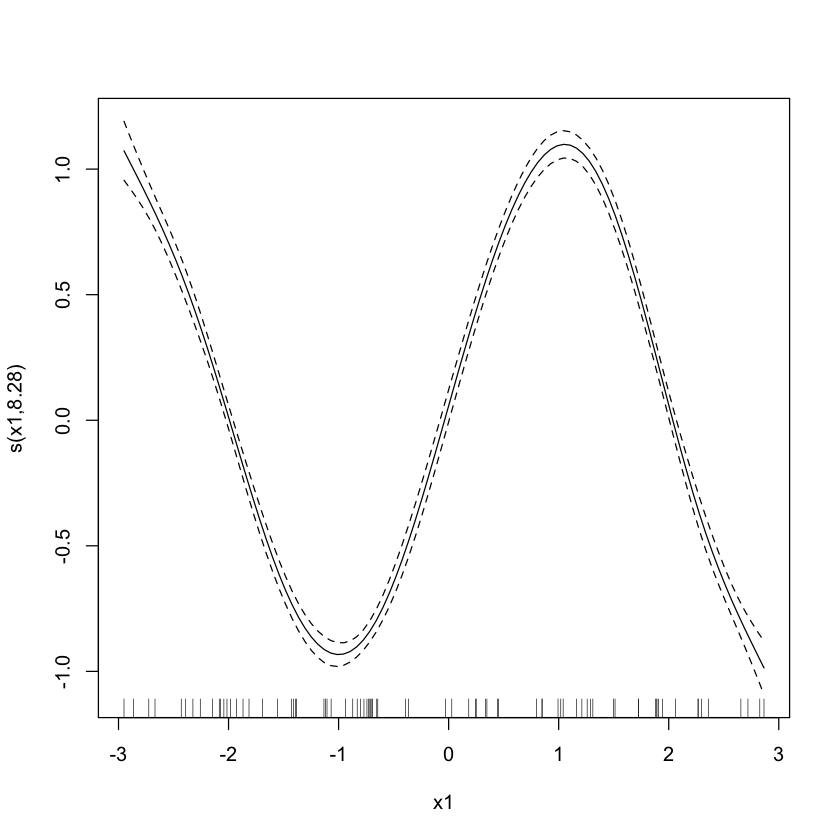

In [4]:
plot(g)

## Inference

With respect to inference, we see that:

1. The p-values for the parametric terms are all smaller than any reasonable significance level, suggesting that they should be in the model in some way. Remember that these are t-tests based on the standard linear regression theory.


2. The p-values for the smooth/nonparametric term is extremely small, suggesting that the predictor should be in the model in some way. Remember that this test is an  F-test, as mentioned in the previous lesson.


3. The edf for the smooth term is $8.283$, which is suggestive that the fit should be nonlinear (as opposed to linear/parametric). 


4. Our fit metrics, $R^2$ and adjusted $R^2$ are all very high, suggesting a good fit, $\approx 0.99$, which is not surprising, because we know this model fits the data well, based on how it was generated.

For comparison, consider the following modified model that includes a smooth of $x_2$ in addition to $x_1$:

In [5]:
g2 = gam(y ~ s(x1) + s(x2) + x3, data=train, family = gaussian)
summary(g2)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1) + s(x2) + x3

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.93527    0.01707  582.09   <2e-16 ***
x3B          1.04578    0.02628   39.79   <2e-16 ***
x3C          1.96174    0.02520   77.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
        edf Ref.df     F p-value    
s(x1) 8.247  8.836 637.4  <2e-16 ***
s(x2) 2.465  3.146 187.3  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.995   Deviance explained = 99.6%
GCV = 0.0087746  Scale est. = 0.0072706  n = 80

Here, we see that the edf associated with the smooth of $x_2$ is $2.465$. This edf is much lower than the edf for $x_1$. Using visual assessments of the smooths will give us additional insight into whether the smooth is necessary:

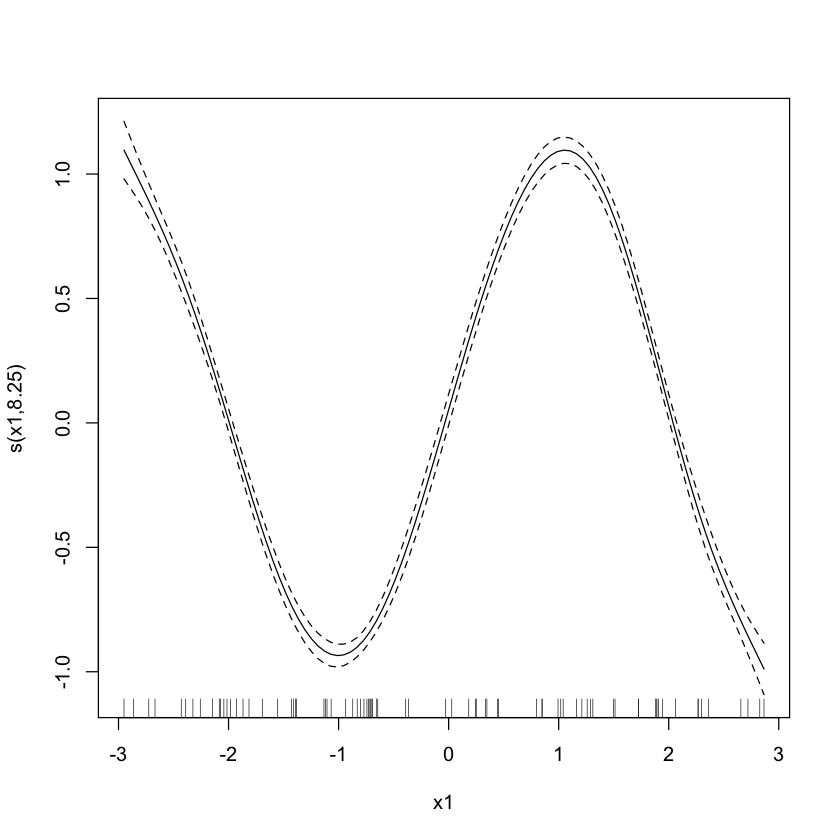

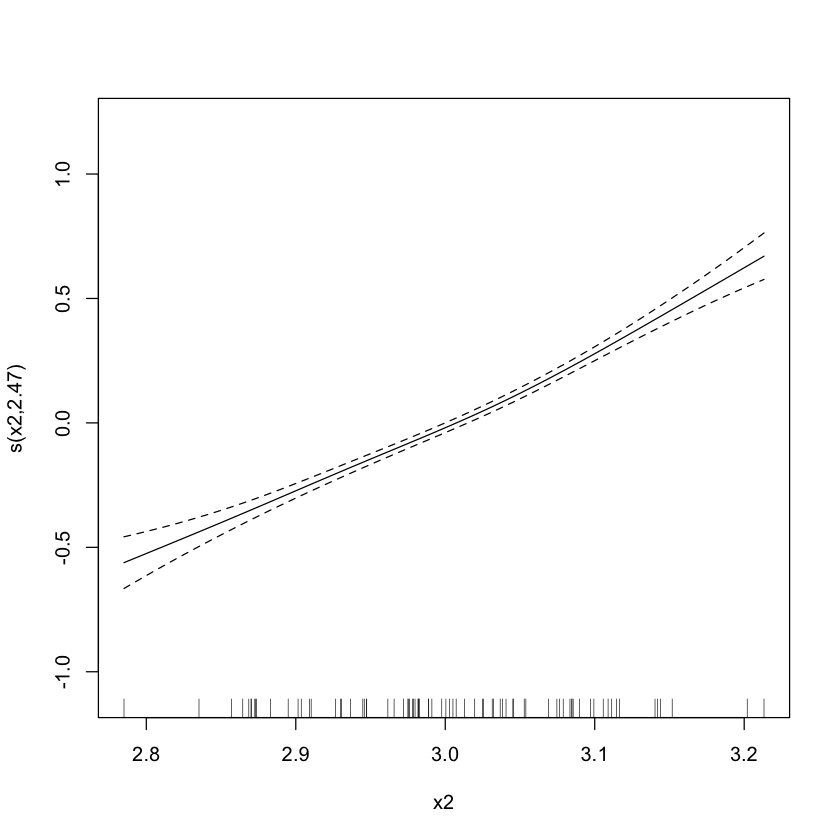

In [6]:
plot(g2)

The plot of the smooth for $x_2$ is basically linear, suggesting that it could enter the model linearly, as it did in the model `g`. Recall that the data were generated such that $x_2$ entered the model linearly. So, the GAM picks this up!

If we are not convinced which model is better, we could also compare the models based on the MSE of the test set:

In [7]:
mse_g = mean((test$y - predict.gam(g, newdata = test))^2)
cat("The MSE for the GAM g is ", mse_g, ".")
mse_g2 = mean((test$y - predict.gam(g2, newdata = test))^2)
cat("The MSE for the GAM g2 is ", mse_g2, ".")
l = lm(y ~ x1 + x2 + x3, data = train)
mse_l = mean((test$y - predict(l))^2)
cat(" The MSE for a standard linear model is ", mse_l, ".")

The MSE for the GAM g is  0.0138981 .The MSE for the GAM g2 is  0.0135524 . The MSE for a standard linear model is  1.517204 .

Importantly, the test set (prediction) MSE for the GAM models are quite good, and very similar. This similarity makes sense because the models are basically the same: smoothing $x_2$ doesn't give a curved function, so it's basically the same as having it enter parametrically. 

The test set MSE for the linear model however, is much worse. That's because it's the wrong model! :) 
